## With NYC dataset

In [219]:
import pandas as pd
import numpy as np

df = pd.read_csv('datasets/nyc.csv')
df.head()

,Price,Food,Decor,Service,East
0,36,23,14,21,1
1,49,20,14,16,0
2,58,20,15,20,1
3,44,18,18,20,0
4,40,20,15,15,0


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Price    168 non-null    int64
 1   Food     168 non-null    int64
 2   Decor    168 non-null    int64
 3   Service  168 non-null    int64
 4   East     168 non-null    int64
dtypes: int64(5)
memory usage: 6.7 KB


In [221]:
df['East'].value_counts()

East
0    85
1    83
Name: count, dtype: int64

In [222]:
df.shape

(168, 5)

In [223]:
df.drop_duplicates(keep='first', inplace=True)
# keep='first' -> Keeps the first occurrence of each duplicate and removes the rest.
# inplace=True  -> Makes the change directly to df, without needing to assign it to a new variable.
df

,Price,Food,Decor,Service,East
0,36,23,14,21,1
1,49,20,14,16,0
2,58,20,15,20,1
3,44,18,18,20,0
4,40,20,15,15,0
...,...,...,...,...,...
163,53,21,18,16,0
164,34,21,20,21,1
165,32,20,16,19,1
166,41,21,12,19,0


In [224]:
df.isnull().sum()

Price      0
Food       0
Decor      0
Service    0
East       0
dtype: int64

In [225]:
df.describe()

,Price,Food,Decor,Service,East
count,168.000000,168.000000,168.000000,168.000000,168.000000
mean,45.327381,21.434524,15.785714,17.839286,0.494048
std,9.948669,2.281506,2.633599,1.949452,0.501459
min,30.000000,18.000000,12.000000,15.000000,0.000000
25%,37.000000,20.000000,14.000000,16.000000,0.000000
50%,44.500000,21.000000,16.000000,18.000000,0.000000
75%,53.000000,23.000000,18.000000,19.000000,1.000000
max,100.000000,25.000000,20.000000,21.000000,1.000000


<Axes: ylabel='Price'>

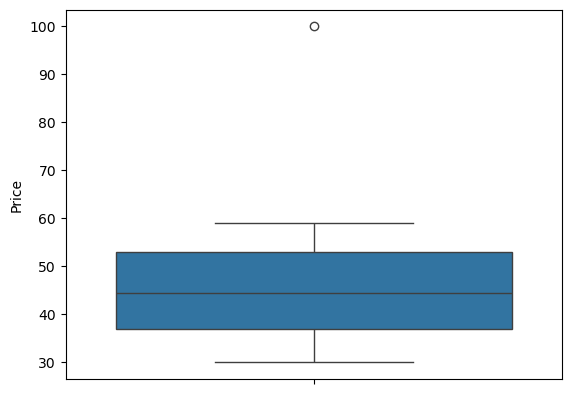

In [226]:
import seaborn as sns

sns.boxplot(y = df['Price']) 

In [227]:
 #  box plot (also known as a box-and-whisker plot)
'''
Box plots provide a visual summary of the distribution of data, including:

Minimum

1st Quartile (Q1)

Median (Q2)

3rd Quartile (Q3)

Maximum

(Optionally) Outliers
'''

# Try to add some outliers data (very large or very small) in the column and find out the output

'\nBox plots provide a visual summary of the distribution of data, including:\n\nMinimum\n\n1st Quartile (Q1)\n\nMedian (Q2)\n\n3rd Quartile (Q3)\n\nMaximum\n\n(Optionally) Outliers\n'

In [228]:
df['Price'].unique()

array([ 36,  49,  58,  44,  40,  37,  50, 100,  48,  52,  53,  33,  32,
        51,  31,  41,  59,  35,  57,  30,  55,  54,  46,  56,  39,  45,
        34,  38,  47,  43,  42], dtype=int64)

<Axes: ylabel='Food'>

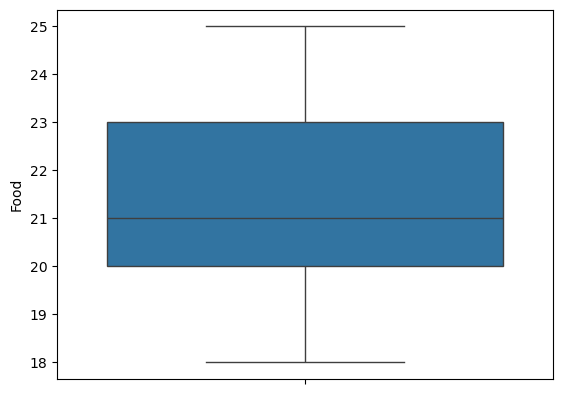

In [229]:
sns.boxplot(y = df['Food'])

<Axes: ylabel='Decor'>

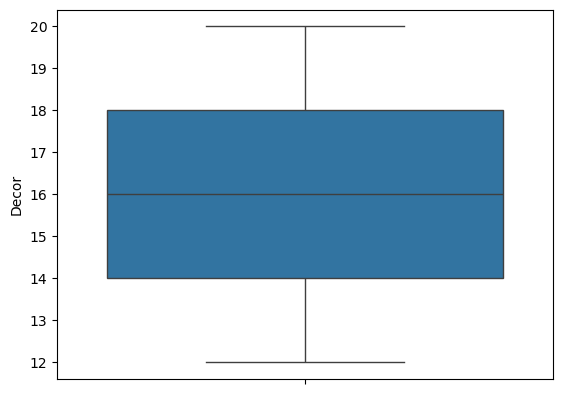

In [230]:
sns.boxplot(y = df['Decor'])

In [231]:
df['Decor'].unique()

array([14, 15, 18, 20, 12, 19, 13, 16, 17], dtype=int64)

<Axes: ylabel='Service'>

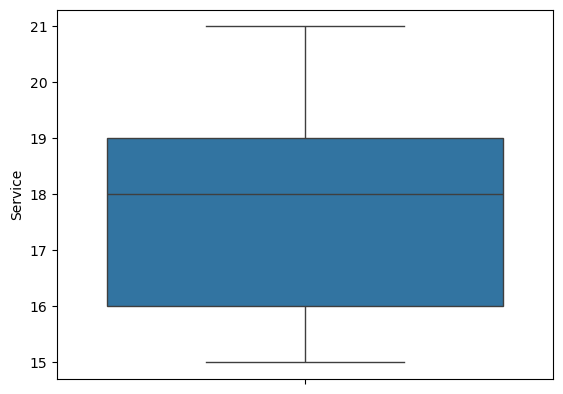

In [232]:
sns.boxplot(y = df['Service'])

In [ ]:
x = df.drop(columns=['East'])
x.corr()
#df.drop(columns='object').corr()

,Price,Food,Decor,Service
Price,1.000000,-0.040337,-0.032959,0.009522
Food,-0.040337,1.000000,0.118237,0.115423
Decor,-0.032959,0.118237,1.000000,-0.031241
Service,0.009522,0.115423,-0.031241,1.000000


In [ ]:

'''
1 ->	Perfect positive correlation (as one increases, so does the other)
0 ->	No linear correlation
-1 ->	Perfect negative correlation (as one increases, the other decreases)
'''

'\n1 ->\tPerfect positive correlation (as one increases, so does the other)\n0 ->\tNo linear correlation\n-1 ->\tPerfect negative correlation (as one increases, the other decreases)\n'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
X = df[['Food']]
y = df['Price']


#y = np.log(y)            Price is limited to a range so we need not to take logarithm

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
#Finding the mean for test data value
base_pred = np.mean(y_test)
print(base_pred)

43.78431372549019


In [ ]:
#Repeating same value tilllength of test data

base_pred = np.repeat(base_pred, len(y_test))
base_pred

array([43.78431373, 43.78431373, 43.78431373, 43.78431373, 43.78431373,
       43.78431373, 43.78431373, 43.78431373, 43.78431373, 43.78431373,
       43.78431373, 43.78431373, 43.78431373, 43.78431373, 43.78431373,
       43.78431373, 43.78431373, 43.78431373, 43.78431373, 43.78431373,
       43.78431373, 43.78431373, 43.78431373, 43.78431373, 43.78431373,
       43.78431373, 43.78431373, 43.78431373, 43.78431373, 43.78431373,
       43.78431373, 43.78431373, 43.78431373, 43.78431373, 43.78431373,
       43.78431373, 43.78431373, 43.78431373, 43.78431373, 43.78431373,
       43.78431373, 43.78431373, 43.78431373, 43.78431373, 43.78431373,
       43.78431373, 43.78431373, 43.78431373, 43.78431373, 43.78431373,
       43.78431373])

In [ ]:
#Finding the RMSE
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))
base_root_mean_square_error

9.31857458907555

In [ ]:
ln1 = LinearRegression(fit_intercept=True)

model1 = ln1.fit(X_train, y_train)

In [ ]:
#finding the mean for test data value

pred1 = ln1.predict(X_test)
pred1

array([46.19377226, 46.03411483, 45.87445741, 46.03411483, 46.03411483,
       45.87445741, 45.71479999, 45.87445741, 45.71479999, 45.39548515,
       45.87445741, 46.19377226, 46.03411483, 46.5130871 , 46.5130871 ,
       46.19377226, 46.19377226, 45.39548515, 46.19377226, 45.39548515,
       45.71479999, 46.03411483, 45.71479999, 46.03411483, 45.71479999,
       45.55514257, 45.39548515, 45.55514257, 46.5130871 , 45.71479999,
       46.19377226, 45.55514257, 45.55514257, 45.87445741, 45.71479999,
       45.55514257, 46.19377226, 46.19377226, 46.19377226, 45.55514257,
       45.87445741, 45.71479999, 45.55514257, 46.19377226, 45.55514257,
       45.55514257, 45.87445741, 45.71479999, 46.03411483, 46.5130871 ,
       45.71479999])

In [ ]:
#finding the MSE and RMSE

ln1_mse = mean_squared_error(y_test, pred1)

ln1_rmse = np.sqrt(ln1_mse)
print(ln1_rmse)

9.560272806394513


In [ ]:
#finding the R-squared

r2_ln1_test1 = ln1.score(X_test, y_test)

print(r2_ln1_test1)

-0.05254724502398589


In [ ]:
cols = df.columns
cols

Index(['Price', 'Food', 'Decor', 'Service', 'East'], dtype='object')

In [ ]:
X = df[[ 'Food', 'Decor', 'Service', 'East']]
y = df['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
ln2 = LinearRegression(fit_intercept=True)

model2 = ln2.fit(X_train, y_train)

In [ ]:
pred2 = ln2.predict(X_test)
pred2

array([45.50976545, 45.57021164, 41.29447576, 48.6862283 , 51.00215135,
       46.38428305, 43.29188764, 43.04196277, 46.30834323, 44.56163032,
       43.95253122, 43.95175712, 49.11827833, 40.72449154, 43.19306831,
       43.86183951, 45.26719411, 44.54536259, 50.01486898, 48.22981529,
       44.56085622, 44.21794971, 48.03956251, 50.66001893, 44.59768117,
       43.95330531, 47.85085793, 46.26922836, 46.19325618, 46.97634033,
       44.25706459, 44.62130241, 43.74755891, 50.73673285, 40.87640353,
       43.45851916, 47.73577088, 45.50976545, 48.60951439, 48.8373662 ,
       50.05246802, 41.0658822 , 46.93722545, 45.50976545, 48.49523379,
       44.27917   , 49.86298934, 47.029433  , 50.66001893, 44.73480892,
       43.00284789])

In [ ]:
#finding the MSE and RMSE

ln2_mse = mean_squared_error(y_test, pred2)

ln2_rmse = np.sqrt(ln2_mse)
print(ln2_rmse)

10.741968764719255


In [ ]:
#finding the R-squared

r2_ln2_test2 = ln2.score(X_test, y_test)

print(r2_ln2_test2)

-0.3288280861714026


## With own dataset

In [ ]:
df = pd.read_csv("datasets/outliers.csv")
df

,HouseSize,DistanceToCity,Location,Price
0,48.6,27.90,B,19.35
1,65.2,25.99,A,25.37
2,47.7,29.19,A,19.66
3,47.7,32.02,C,18.61
4,65.8,39.43,B,27.20
...,...,...,...,...
85,115.4,81.93,C,45.12
86,133.0,75.58,C,50.43
87,132.6,80.77,B,50.44
88,130.1,80.29,C,52.66


In [ ]:
df.isnull().sum()

HouseSize         0
DistanceToCity    0
Location          0
Price             0
dtype: int64

In [ ]:
df['Location'].unique()

array(['B', 'A', 'C'], dtype=object)

In [ ]:
df['Location'].value_counts()

Location
B    33
A    30
C    27
Name: count, dtype: int64

In [ ]:
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
df.describe()

,HouseSize,DistanceToCity,Price
count,90.000000,90.000000,90.000000
mean,53.281111,32.865111,22.401778
std,20.321925,12.138333,7.312295
min,23.800000,20.410000,13.510000
25%,44.100000,26.280000,19.122500
50%,49.450000,30.895000,20.450000
75%,57.075000,33.497500,23.340000
max,133.000000,81.930000,52.660000


In [ ]:
import matplotlib.pyplot as plt

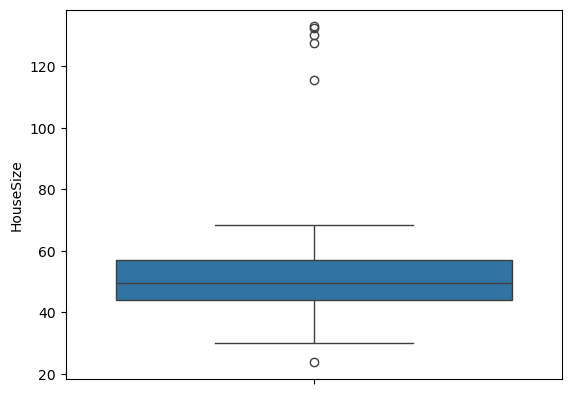

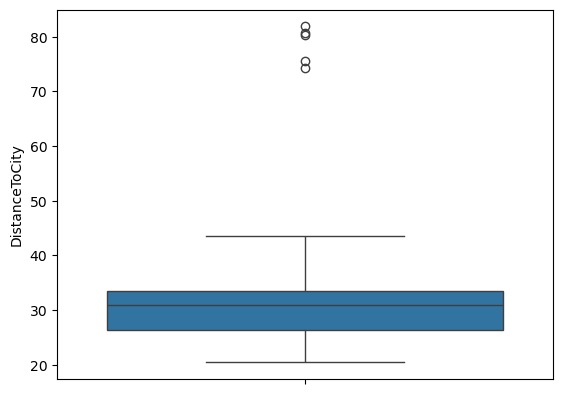

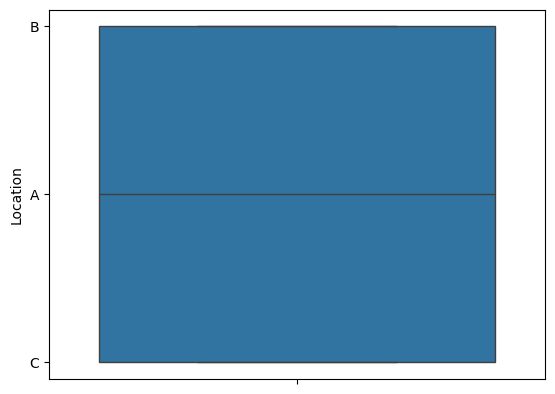

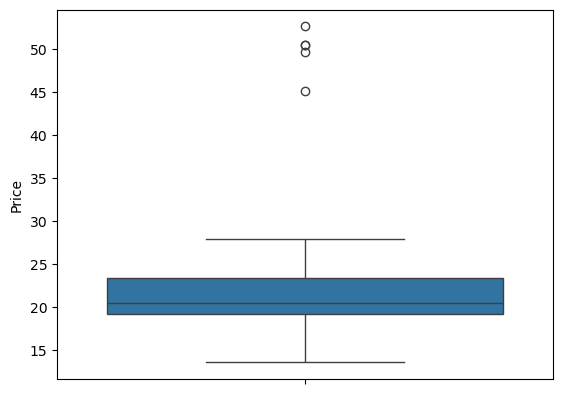

In [ ]:
for cols in df.columns:
    plt.figure()
    sns.boxplot(y=df[cols])

In [ ]:
df.drop(columns=['Location'],inplace=True)

In [ ]:
df.corr()

,HouseSize,DistanceToCity,Price
HouseSize,1.000000,0.802199,0.982737
DistanceToCity,0.802199,1.000000,0.858075
Price,0.982737,0.858075,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [ ]:
x = df[['HouseSize','DistanceToCity']]
y = df['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
#Finding the mean for test data value
base_pred = np.mean(y_test)
print(base_pred)

21.16814814814815


In [ ]:
#Repeating same value tilllength of test data

base_pred = np.repeat(base_pred, len(y_test))
base_pred

array([21.16814815, 21.16814815, 21.16814815, 21.16814815, 21.16814815,
       21.16814815, 21.16814815, 21.16814815, 21.16814815, 21.16814815,
       21.16814815, 21.16814815, 21.16814815, 21.16814815, 21.16814815,
       21.16814815, 21.16814815, 21.16814815, 21.16814815, 21.16814815,
       21.16814815, 21.16814815, 21.16814815, 21.16814815, 21.16814815,
       21.16814815, 21.16814815])

In [ ]:
#Finding the RMSE

base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))
base_root_mean_square_error

6.2011815105026775

In [ ]:
ln1 = LinearRegression(fit_intercept=True)

model1 = ln1.fit(X_train, y_train)

In [ ]:
pred1 = ln1.predict(X_test)
pred1

array([20.44508359, 19.74138128, 20.57888637, 19.54847936, 13.64929756,
       18.36639872, 16.19791236, 23.57724458, 22.14940475, 49.28962028,
       22.7677384 , 20.06922907, 21.38141516, 21.76227911, 18.74556322,
       19.19730408, 22.0096682 , 17.20100623, 24.2073661 , 19.14211132,
       22.81564565, 19.98129605, 22.13673216, 18.8164005 , 21.84195256,
       21.49818206, 24.96159986])

In [ ]:
#finding the MSE and RMSE

ln1_mse = mean_squared_error(y_test, pred1)

ln1_rmse = np.sqrt(ln1_mse)
print(ln1_rmse)

1.037497026424951


In [ ]:
#finding the R-squared

r2_ln1_test1 = ln1.score(X_test, y_test)

print(r2_ln1_test1)

0.9720085862093332
